Q: Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [75]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

df = pd.read_csv("Carseats.csv")

X={
    "Price" : df["Price"],
    "Urban" : df["Urban"].replace({"Yes": 1, "No": 0}),
    "US" : df ["US"].replace({"Yes": 1, "No": 0})

}

X = pd.DataFrame(X)

X = sm.add_constant(X)

y= df["Sales"]

model= sm.OLS(y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           2.39e-23
Time:                        21:35:56   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

Q: Provide an interpretation of each coefficient in the model. Be careful-some of the variables in the model are qualitative!

#A:

Price = -0.054s

Interpretation = the effect of a 1-unit increase in Price (for fixed values of Urban & US) is a change in Sales of -0.054 units (54 sales).


Urban = -0.0219

Interpretation = the effect of a store being in an urban area (for fixed values of Price & US) is a change in Sales of 0.022 units (22 sales). However, in this case, since the p-value for this variables T-test is so high, we can say that there is no evidence for a relationship between the car seat Sales at a store and whether the store was Urban (or rural).


US = 1.2006

Interpretation = the effect of a store being in the US (for fixed values of Price & Urban) is a change in Sales of 1.2 units (1200 sales).

Q: For which of the predictors can you reject the null hypothesis H0:βj=0

#a: We can reject the null hypothesis for the Price and US predictors, but there is insufficient evidence to reject the null hypothesis that Urban's coefficient is zero.

Q: On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [38]:
#A:

Xa = X.drop(["Urban"], axis=1) 

modela = sm.OLS(y, Xa).fit()

print(modela.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           2.66e-24
Time:                        20:30:53   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

Q: How well do the models in (a) and (e) fit the data?

#A:

a model:
    R-squared:                       0.239
    Adj. R-squared:                  0.234

e model:
    R-squared:                       0.239
    Adj. R-squared:                  0.235


model e fits better due to the smaller n

Q: Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [74]:
#A:

confint = modela.conf_int(alpha=0.05)

print(confint)

              0          1
const  11.79032  14.271265
Price  -0.06476  -0.044195
US      0.69152   1.707766


Q: Is there evidence of outliers or high leverage observations in the model from (e)

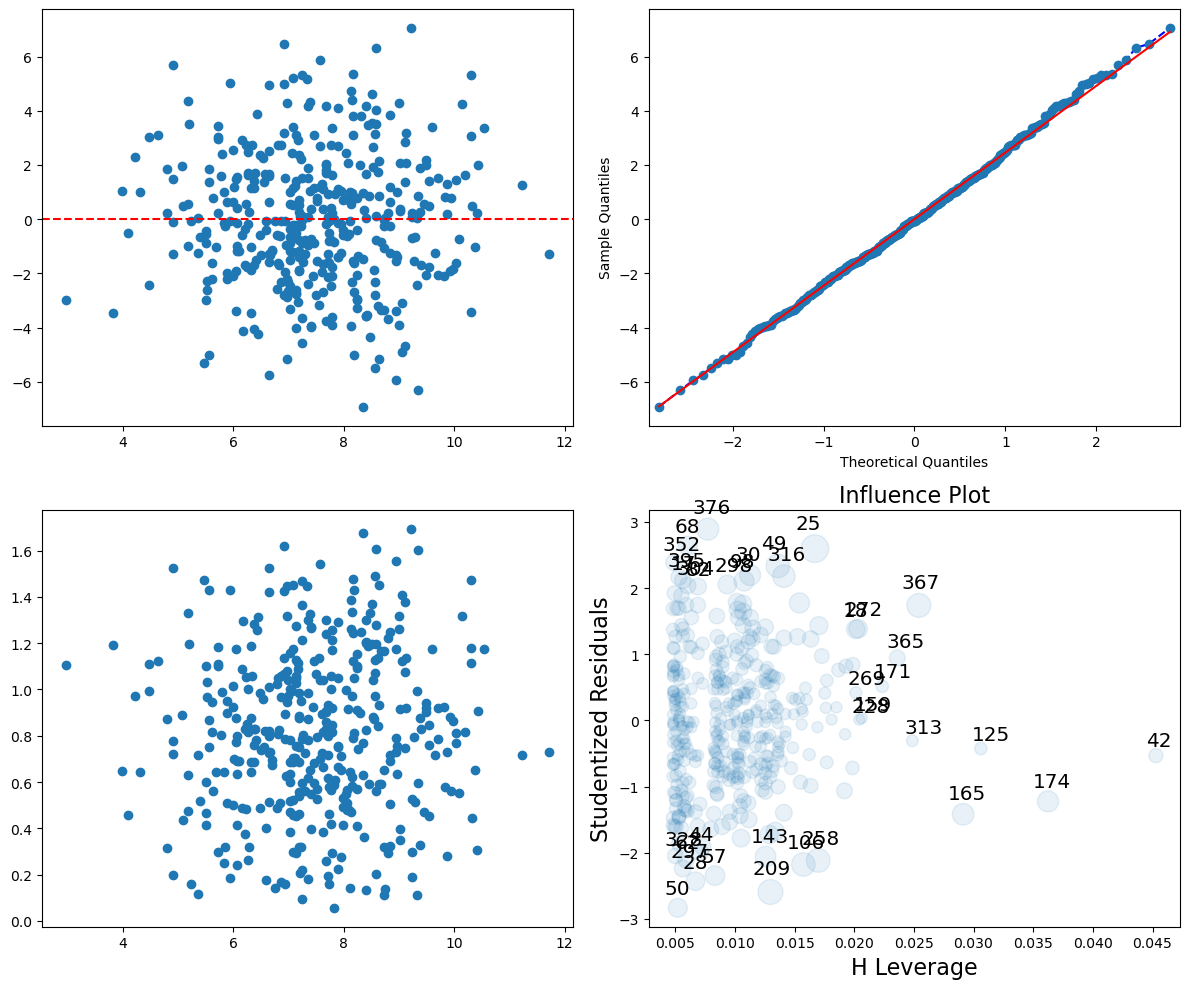

In [105]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

axes[0, 0].scatter(model.fittedvalues, model.resid)
axes[0, 0].axhline(y=0, color="red", linestyle="dashed")

sm.qqplot(model.resid, line="s",linestyle="dashed", ax=axes[0, 1])

axes[1, 0].scatter(model.fittedvalues, abs(model.get_influence().resid_studentized_internal)**0.5)


sm.graphics.influence_plot(model, ax=axes[1, 1],criterion= "Cooks", plot_alpha= 0.1, size =20)

plt.tight_layout()

plt.show()

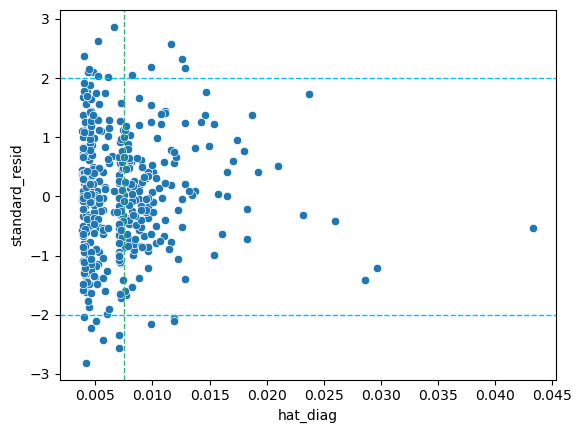

In [99]:
stats = modela.get_influence().summary_frame()

sns.scatterplot(x=stats["hat_diag"], y=stats["standard_resid"])
plt.axhline(y=-2, color="deepskyblue", linestyle="--", linewidth=1)
plt.axhline(y=2, color="deepskyblue", linestyle="--", linewidth=1)
plt.axvline(x=3 / len(df), color="mediumseagreen", linestyle="--", linewidth=1)

plt.show()

<Axes: xlabel='hat_diag', ylabel='standard_resid'>

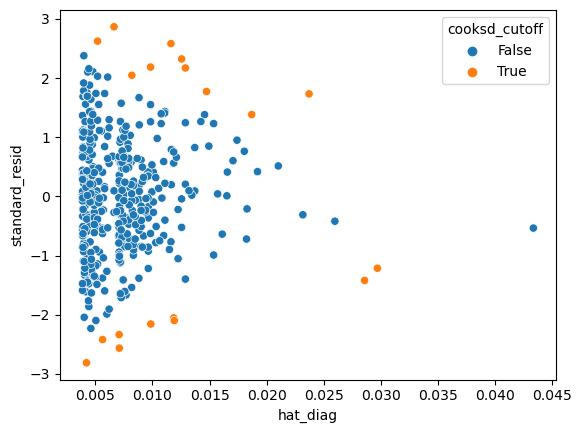

In [107]:
nrow = len(df)
stats['cooksd_cutoff'] = ['True' if x >= 4 / nrow else 'False' for x in stats['cooks_d']]

sns.scatterplot(x=stats['hat_diag'], y=stats['standard_resid'],hue=stats['cooksd_cutoff'])

A: High leverage and high residual statistics can't be observed